### Analyte Classification using k-nn on binned data
#### Edgar Acuna 
#### June 2021

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the data

In [10]:
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)
ys=pd.read_csv("c://onr2020/substrateIDs.csv",header=None)
print(y.iloc[[9,99,499,999,2999, 4999,7999,9999,11999,14999]])
print(ys.iloc[[9,99,499,999,2999, 4999,7999,9999,11999,14999]])

        0
9       9
99      5
499    14
999     2
2999   24
4999   12
7999   36
9999   32
11999  21
14999  24
       0
9      2
99     1
499    2
999    8
2999   3
4999   9
7999   1
9999   8
11999  8
14999  6


In [3]:
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
dfset1.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.041418,0.041621,0.042198,0.042688,0.042924,0.042274,0.042542,0.042663,0.042715,0.042664,...,0.053219,0.053131,0.053091,0.053140,0.053249,0.053325,0.053364,0.053356,0.053500,0.055986
1,0.694710,0.695840,0.697180,0.706530,0.703970,0.709130,0.711480,0.711330,0.712370,0.712980,...,0.754260,0.751040,0.753630,0.754490,0.752980,0.755760,0.752910,0.755320,0.753030,0.753230
2,0.048978,0.048432,0.047685,0.047086,0.046811,0.046752,0.046624,0.046443,0.046241,0.045999,...,0.260320,0.259590,0.258910,0.258210,0.257440,0.256580,0.255700,0.254800,0.254160,0.257110
3,0.039762,0.039495,0.038982,0.038339,0.037769,0.037301,0.036799,0.036316,0.035921,0.035612,...,0.257600,0.256890,0.256160,0.255370,0.254540,0.253720,0.252880,0.251970,0.251070,0.250190
4,0.022387,0.022508,0.022091,0.023054,0.023010,0.022740,0.023889,0.023936,0.023464,0.024810,...,0.025036,0.024307,0.024636,0.022298,0.023536,0.025714,0.025306,0.025062,0.023609,0.023901


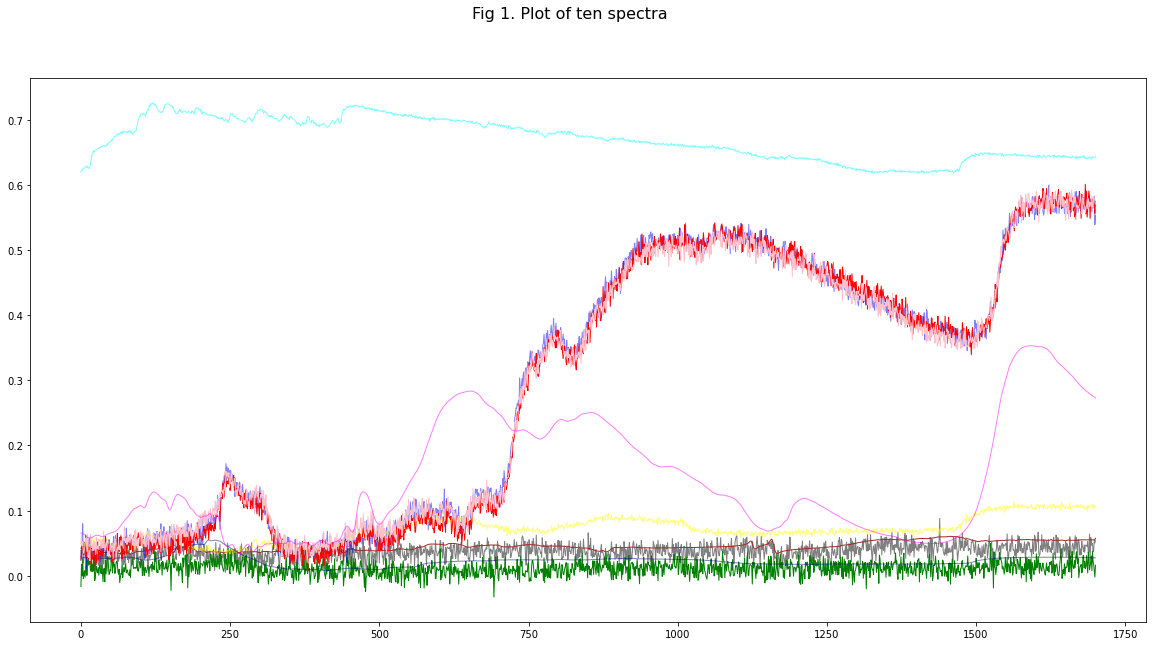

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
x=np.arange(0,1701,1)
fig.suptitle("Fig 1. Plot of ten spectra",fontsize=16)
ax.plot(x, dfset1.iloc[9,:], color='black',lw=1, alpha=0.5, label='Spectra No. 10')
ax.plot(x,dfset1.iloc[99,:], color='green', lw=1, label='Spectra No. 100')
ax.plot(x,dfset1.iloc[499,:], color='brown', lw=1, label='Spectra No. 500')
ax.plot(x, dfset1.iloc[999,:], color='blue', lw=1, alpha=0.5, label='Spectra No. 1000')
ax.plot(x, dfset1.iloc[2999,:], color='cyan', lw=1, alpha=0.5, label='Spectra No. 3000')
ax.plot(x, dfset1.iloc[4999,:], color='yellow', lw=1, alpha=0.5, label='Spectra No. 5000')
ax.plot(x, dfset1.iloc[7999,:], color='navy', lw=1, alpha=0.5, label='Spectra No. 8000')
ax.plot(x,dfset1.iloc[9999,:], color='red', lw=1, label='Spectra No. 10000')
ax.plot(x,dfset1.iloc[11999,:], color='pink', lw=1, label='Spectra No. 12000')
ax.plot(x, dfset1.iloc[14999,:], color='magenta',lw=1, alpha=0.5, label='Spectra No. 15000')
#ax.legend(loc='best', frameon=False)

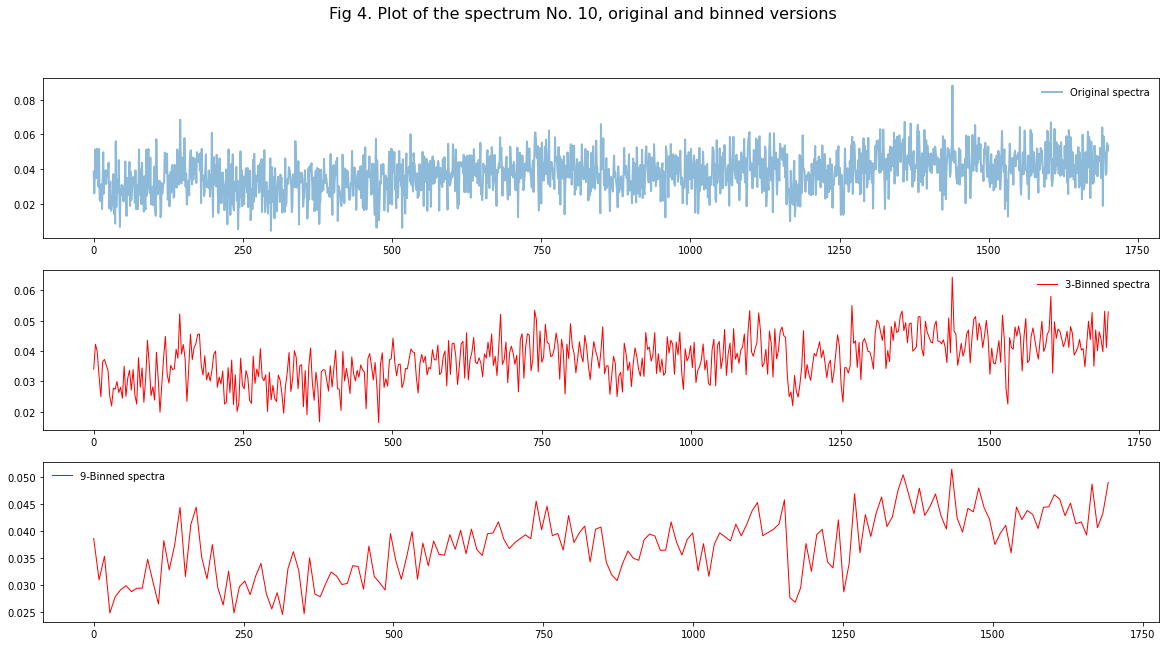

In [12]:
#Applyng the binned method on the tenth spectra
c2=dfset1.iloc[9,:]
binc10=np.zeros(567)
for i in range (0,1701,3):
    k=int(i/3) 
    mean=(c2[i] + c2[i+1] + c2[i+2])/3
    binc10[k]=mean
binc10a=np.zeros(189)
for i in range (0,1701,9):
    k=int(i/9) 
    mean=(c2[i] + c2[i+1] + c2[i+2]+c2[i+3] + c2[i+4] + c2[i+5]+c2[i+6] + c2[i+7] + c2[i+8])/9
    binc10a[k]=mean
#Plotting the original and the binned spectra
x=np.arange(0,1701,1)
y1=np.arange(0,1701,3)
y2=np.arange(0,1701,9)
fig = plt.figure(figsize=(20,10))
fig.suptitle("Fig 4. Plot of the spectrum No. 10, original and binned versions",fontsize=16)
ax1=fig.add_subplot(311)
ax1.plot(x, c2, lw=2, alpha=0.5, label='Original spectra')
ax1.legend(loc='best', frameon=False)
ax2=fig.add_subplot(312)
ax2.plot(y1,binc10, 'r-', lw=1, label='3-Binned spectra')
ax2.legend(loc='best', frameon=False)
ax3=fig.add_subplot(313)
ax3.plot(y2,binc10a, 'r-', lw=1, label='9-Binned spectra')
ax3.legend(loc='best', frameon=False)
#fig, ax = plt.subplots(figsize=(20,10))
#ax.plot(x, c2, lw=2, alpha=0.5, label='Original spectra')
#ax.plot(y1,binc10, 'r-', lw=1, label='Binned spectra')
#ax.legend(loc='best', frameon=False)

In [5]:
#Creating the binned data
binned=np.zeros((18000,567))  
for j in range(18000):
    tempo=dfset1.iloc[j,:]
    for i in range (0,1701,3):
        k=int(i/3) 
        mean=(tempo[i] + tempo[i+1] + tempo[i+2])/3
        binned[j,k]=mean
b=pd.DataFrame(binned)

### 1. Applying knn with k=45  and all  40 classes (analytes)

In [26]:
neigh = KNeighborsClassifier(n_neighbors=45)
neigh.fit(b,y) 
print("Accuracy estimated by resubstitution", neigh.score(b, y))

Accuracy estimated by resubstitution 0.6727222222222222


### Estimating the accuracy using the holdout method 

In [27]:
# We will find by inspection the best k according to the classifier accuracy on the test set
X_train, X_test, y_train, y_test = train_test_split(b,y, test_size=0.2,random_state=0)
kVals = range(1, 20, 2)
accuracies = []

# loop sobre los valores de kVals
for k in range(1, 40, 2):
    # Entrenar el clasificador  con el valor actual de  `k`
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    # Evaluar los modelos e imprimiendo sus predicciones
    score = neigh.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=93.08%
k=3, accuracy=88.78%
k=5, accuracy=84.97%
k=7, accuracy=81.64%
k=9, accuracy=78.39%
k=11, accuracy=75.64%
k=13, accuracy=73.75%
k=15, accuracy=72.25%
k=17, accuracy=70.92%
k=19, accuracy=69.19%
k=21, accuracy=67.19%
k=23, accuracy=66.17%
k=25, accuracy=64.58%
k=27, accuracy=63.81%
k=29, accuracy=62.39%
k=31, accuracy=61.53%
k=33, accuracy=59.83%
k=35, accuracy=58.56%
k=37, accuracy=57.97%
k=39, accuracy=57.22%


###  The accuracy is monotonically decreasing as the numbers of neighbors in creases

In [29]:
# Finding out the k that gives the highest accuracy
i = np.argmax(accuracies)
print("k=%d gave the best accuracy %.2f%%" % (kVals[i],
    accuracies[i] * 100))

k=1 gave the best accuracy 93.08%


In [30]:
# Applying again the k-nn classifier with k=3
#neigh = KNeighborsClassifier(n_neighbors=kVals[i])
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [31]:
predictions = neigh.predict(X_test)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("precision=",precision_score(y_test,predictions,average="weighted"))
print("The accuracy is=",neigh.score(X_test,y_test))

F1-score is= 0.8887747357570073
precision= 0.8931819738368065
The accuracy is= 0.8877777777777778


In [32]:
print("EVALUATION ON TESTING DATA")
predictions = neigh.predict(X_test)
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       108
           2       0.93      0.94      0.93        96
           3       0.85      0.95      0.89        98
           4       0.86      0.94      0.90        94
           5       0.91      0.96      0.93        92
           6       0.87      0.94      0.90        96
           7       0.91      0.89      0.90        91
           8       0.91      0.91      0.91        87
           9       0.89      0.96      0.92        83
          10       0.93      0.99      0.96        70
          11       0.99      1.00      0.99        80
          12       0.75      0.88      0.81        88
          13       0.59      0.79      0.68        91
          14       0.84      0.95      0.89        78
          15       0.72      0.87      0.79        78
          16       0.82      0.80      0.81       103
          17       0.86      0.89      0.87       101


#### Notice that analytes 12,13, 18, 24,34 and 37  have low F1-score

### 2. Applying knn with k=3  and two classes: Analyte j (j=1,,..40) versus other analytes (class=0)). 

In [33]:
#Only the first 20 analytes will be analized
labels=list(range(1,21))
import sklearn

In [34]:
def plot_roc(X_train,Xtest,yclass_train,yclass_test):
    #The ROC curve
    train_features = np.array(X_train)
    test_features = np.array(X_test)
    train_labels=np.array(yclass_train)
    test_labels=np.array(yclass_test)
    train_predictions_baseline = neigh.predict(train_features)
    test_predictions_baseline = neigh.predict(test_features)
    fp, tp, _ = sklearn.metrics.roc_curve(train_labels, train_predictions_baseline)
    fp1, tp1, _ = sklearn.metrics.roc_curve(test_labels, test_predictions_baseline)
    roc_auc = sklearn.metrics.auc(fp,tp)
    roc_auc1 = sklearn.metrics.auc(fp1,tp1)
    fig, ax = plt.subplots(1, 1)
    ax.plot(fp, tp, 'b', label='AUC-train = %0.2f'% roc_auc)
    ax.plot(fp1, tp1, 'b--', label='AUC-test = %0.2f'% roc_auc1)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--') 
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid(True)
    plt.show()

Metrics for predicting analyte 1 : accuracy=0.999, F1-score=0.973, Precision=0.986, auc=0.980


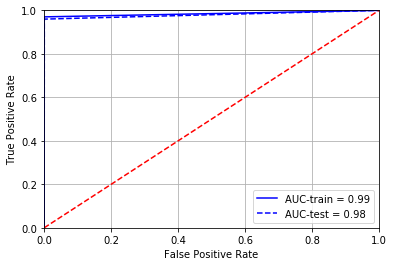

Metrics for predicting analyte 2 : accuracy=0.995, F1-score=0.897, Precision=0.983, auc=0.912


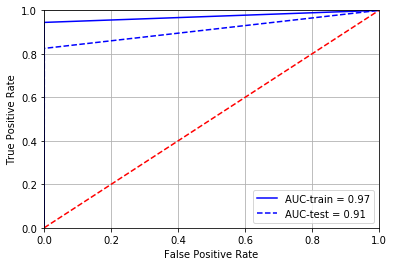

Metrics for predicting analyte 3 : accuracy=0.996, F1-score=0.913, Precision=0.969, auc=0.931


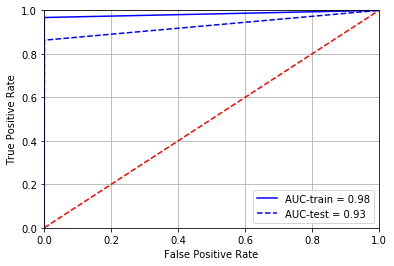

Metrics for predicting analyte 4 : accuracy=0.995, F1-score=0.887, Precision=0.940, auc=0.919


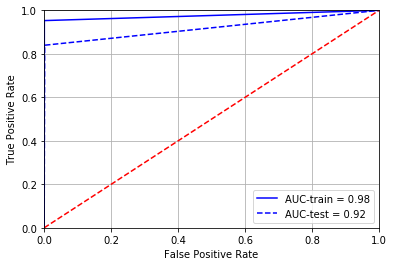

Metrics for predicting analyte 5 : accuracy=0.996, F1-score=0.917, Precision=0.962, auc=0.937


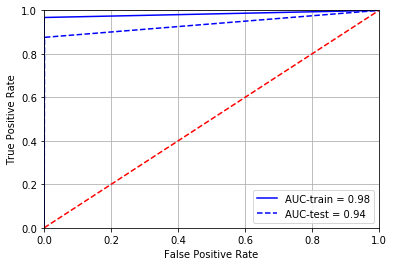

Metrics for predicting analyte 6 : accuracy=0.996, F1-score=0.919, Precision=0.963, auc=0.939


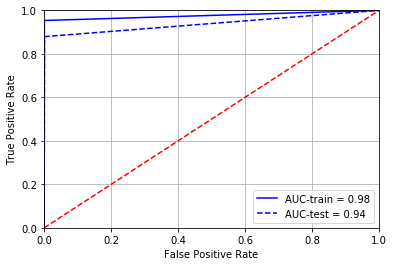

Metrics for predicting analyte 7 : accuracy=0.996, F1-score=0.921, Precision=0.967, auc=0.939


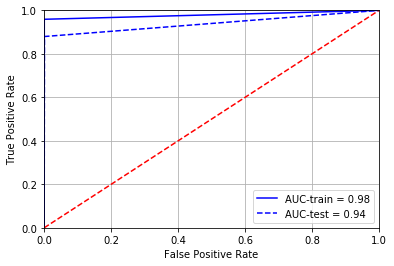

Metrics for predicting analyte 8 : accuracy=0.995, F1-score=0.878, Precision=0.944, auc=0.910


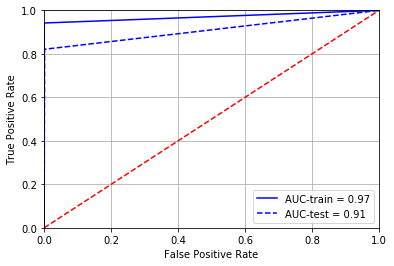

Metrics for predicting analyte 9 : accuracy=0.994, F1-score=0.873, Precision=0.846, auc=0.949


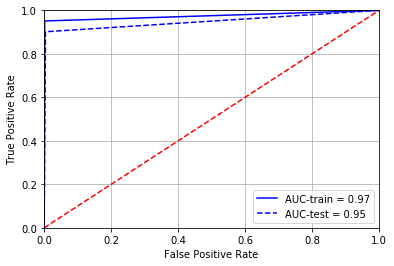

Metrics for predicting analyte 10 : accuracy=0.998, F1-score=0.957, Precision=0.961, auc=0.976


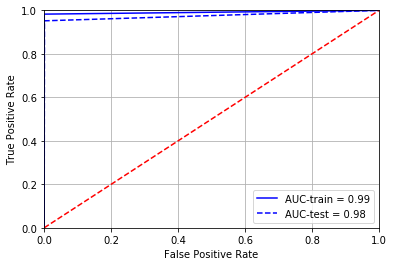

Metrics for predicting analyte 11 : accuracy=0.999, F1-score=0.967, Precision=0.975, auc=0.980


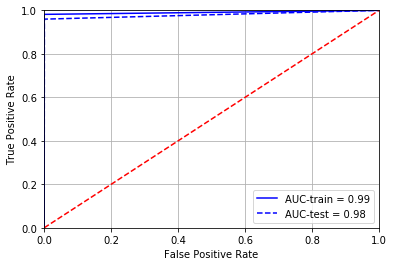

Metrics for predicting analyte 12 : accuracy=0.991, F1-score=0.821, Precision=0.837, auc=0.901


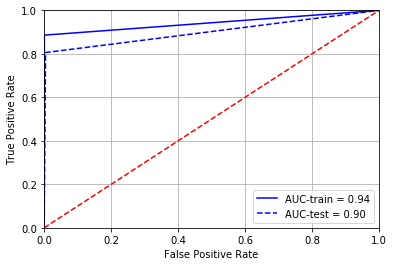

Metrics for predicting analyte 13 : accuracy=0.985, F1-score=0.700, Precision=0.674, auc=0.860


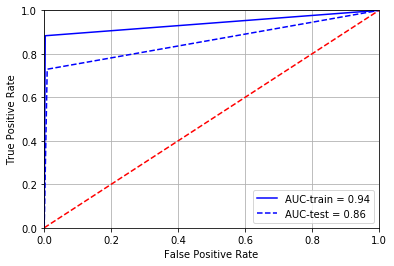

Metrics for predicting analyte 14 : accuracy=0.996, F1-score=0.910, Precision=0.879, auc=0.970


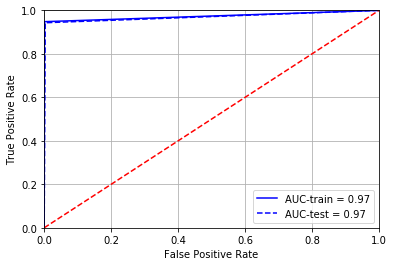

Metrics for predicting analyte 15 : accuracy=0.993, F1-score=0.854, Precision=0.885, auc=0.911


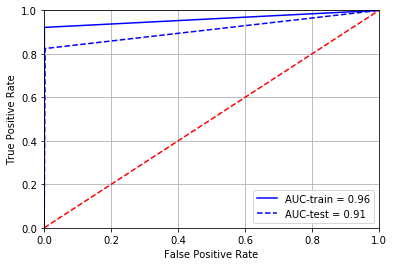

Metrics for predicting analyte 16 : accuracy=0.992, F1-score=0.846, Precision=0.887, auc=0.903


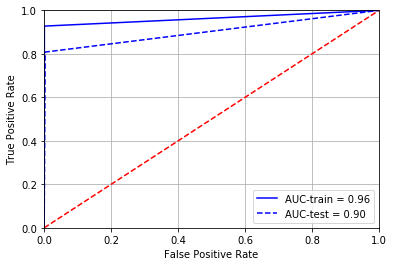

Metrics for predicting analyte 17 : accuracy=0.994, F1-score=0.889, Precision=0.914, auc=0.931


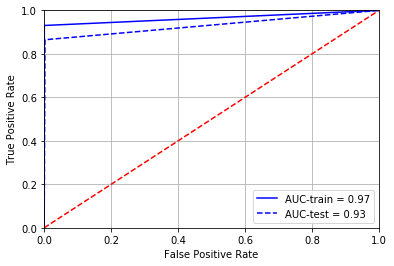

Metrics for predicting analyte 18 : accuracy=0.988, F1-score=0.749, Precision=0.817, auc=0.844


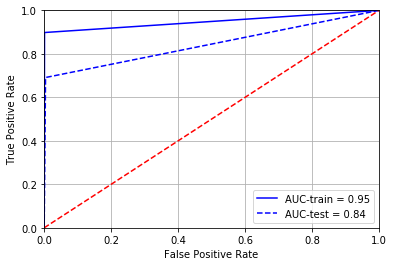

Metrics for predicting analyte 19 : accuracy=0.997, F1-score=0.932, Precision=0.943, auc=0.960


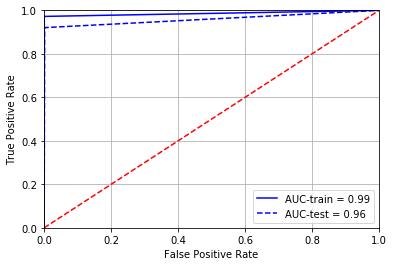

Metrics for predicting analyte 20 : accuracy=0.989, F1-score=0.775, Precision=0.775, auc=0.885


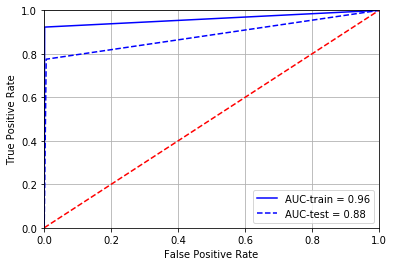

In [35]:
for j in labels:
    yclass=y.copy()
    yclass[yclass!=j]=0
    yclass[yclass==j]=1    
    X_train, X_test, yclass_train, yclass_test = train_test_split(b,yclass,test_size=0.3,random_state=0)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, yclass_train) 
    predictions = neigh.predict(X_test)
    print("Metrics for predicting analyte %d : accuracy=%.3f, F1-score=%.3f, Precision=%.3f, auc=%.3f" %(j, neigh.score(X_test,yclass_test), f1_score(yclass_test,predictions),precision_score(yclass_test,predictions),roc_auc_score(yclass_test,predictions)))
    plot_roc(X_train,X_test,yclass_train,yclass_test)

#### The F1-score is high for all the analytes.  The analytes 12,13,18,24 and 34 have the lowest F1-score